In [207]:
import pandas as pd
import numpy as np
from nltk.tokenize import wordpunct_tokenize
import nltk 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
import gensim
import tensorflow_hub as hub
import tensorflow_text

nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elect\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elect\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elect\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [208]:
data = pd.read_csv("../data/data_clean.csv")
data = data[["Id", "Title", "Body", "Tags"]]
data.reset_index(inplace=True)
data.drop(columns='Id', inplace=True)

data.head()

,index,Title,Body,Tags
0,0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git
1,1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps
2,2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression
3,3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman
4,4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi


In [209]:
data['Post'] = data.apply(lambda x: (x['Title'] + ' ' + x['Body'] if x['Title'] == x['Title'] else x['Body']).lower(), axis=1)

In [210]:
data['Tokens'] = data.apply(lambda x: wordpunct_tokenize(x['Post']), axis=1)

In [211]:
most_used_programming_language = [
    "javascript",
    "js",
    "python",
    "py",
    "go",
    "golang",
    "java",
    "kotlin",
    "php",
    "csharp"
    "c#",
    "swift",
    "net",
    "core", 
    "rb",
    "ruby",
    "c",
    "c++",
    "cpp",
    "matlab",
    "typescript",
    "ts",
    "scala",
    "html",
    "css",
    "rust",
    "rs",
    "perl"
]

data.head()

,index,Title,Body,Tags,Post,Tokens
0,0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,unable to continue with rebase due to untracke...,"[unable, to, continue, with, rebase, due, to, ..."
1,1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, on, ios, 12, ., 2, stu..."
2,2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,__pretty_function__ in constant expression ple...,"[__pretty_function__, in, constant, expression..."
3,3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,how to fix 'http: named cookie not present' in...,"[how, to, fix, ', http, :, named, cookie, not,..."
4,4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,how can i read a file which will be upload fro...,"[how, can, i, read, a, file, which, will, be, ..."


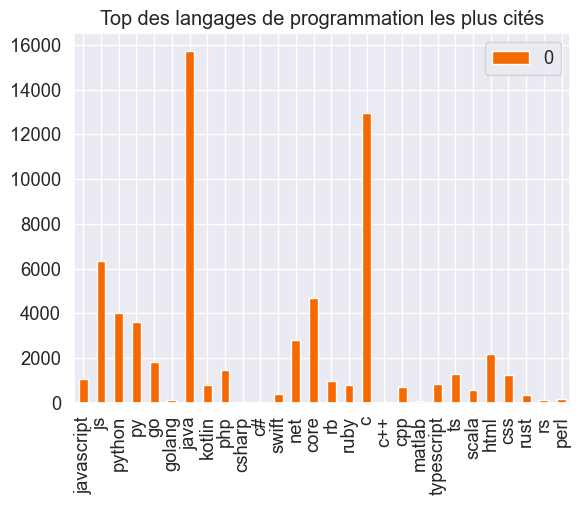

In [212]:
def token_plot(tokens):
    token_count = {
        "javascript": 0,
        "js": 0,
        "python": 0,
        "py": 0,
        "go": 0,
        "golang": 0,
        "java": 0,
        "kotlin": 0,
        "php": 0,
        "csharp": 0,
        "c#": 0,
        "swift": 0,
        "net": 0,
        "core": 0,
        "rb": 0,
        "ruby": 0,
        "c": 0,
        "c++": 0,
        "cpp": 0,
        "matlab": 0,
        "typescript": 0,
        "ts": 0,
        "scala": 0,
        "html": 0,
        "css": 0,
        "rust": 0,
        "rs": 0,
        "perl": 0
    }

    for token_series in tokens:
        for token in token_series:
            if token in most_used_programming_language:
                token_count[token] += 1

    df = pd.DataFrame.from_dict(token_count, orient='index')
    df.plot(kind='bar', color="#f56900", title='Top des langages de programmation les plus cités')

token_plot(data['Tokens'])

# StopWords

In [213]:
stop_words = set(stopwords.words('english'))

def delete_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]   
     
data['Tokens'] = data.apply(lambda x: delete_stopwords(x['Tokens']), axis=1)

data.head()

,index,Title,Body,Tags,Post,Tokens
0,0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,unable to continue with rebase due to untracke...,"[unable, continue, rebase, due, untracked, wor..."
1,1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, ios, 12, ., 2, stuck, ..."
2,2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,__pretty_function__ in constant expression ple...,"[__pretty_function__, constant, expression, pl..."
3,3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,how to fix 'http: named cookie not present' in...,"[fix, ', http, :, named, cookie, present, ', g..."
4,4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,how can i read a file which will be upload fro...,"[read, file, upload, form, ., net, core, api, ..."


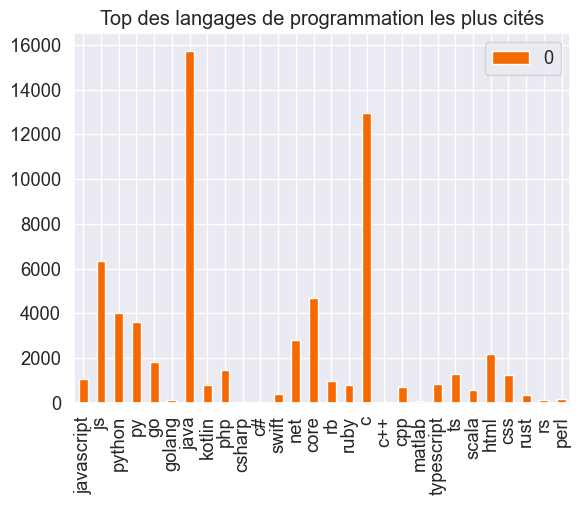

In [214]:
token_plot(data['Tokens'])

# Lemmatization

In [215]:
def lemmatize(token_series):
    lemmatizer = WordNetLemmatizer()
    tokens = []
    for token in token_series:
        tokens.append(lemmatizer.lemmatize(token))
    return tokens 


data['Tokens'] = data.apply(lambda x: lemmatize(x['Tokens']), axis=1) 

In [216]:
data.head()

,index,Title,Body,Tags,Post,Tokens
0,0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,unable to continue with rebase due to untracke...,"[unable, continue, rebase, due, untracked, wor..."
1,1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, io, 12, ., 2, stuck, o..."
2,2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,__pretty_function__ in constant expression ple...,"[__pretty_function__, constant, expression, pl..."
3,3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,how to fix 'http: named cookie not present' in...,"[fix, ', http, :, named, cookie, present, ', g..."
4,4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,how can i read a file which will be upload fro...,"[read, file, upload, form, ., net, core, api, ..."


# TF-IDT

In [217]:
tfidf = TfidfVectorizer()  

data['Tokens'] = data.apply(lambda x: tfidf.fit_transform(x['Tokens']), axis=1)  
  
data['Tokens'].head()

0      (0, 56)\t1.0\n  (1, 11)\t1.0\n  (2, 44)\t1.0...
1      (0, 38)\t1.0\n  (1, 55)\t1.0\n  (2, 5)\t1.0\...
2      (0, 0)\t1.0\n  (1, 9)\t1.0\n  (2, 14)\t1.0\n...
3      (0, 135)\t1.0\n  (2, 159)\t1.0\n  (4, 188)\t...
4      (0, 41)\t1.0\n  (1, 17)\t1.0\n  (2, 58)\t1.0...
Name: Tokens, dtype: object

# World2Vec

In [218]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Embedding, GlobalAveragePooling1D
from tensorflow.python.keras.layers import Input

w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = len(data['Post']) # adapt to length of sentences
sentences = data['Post'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [219]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42,
                                   workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 97735
Word2Vec trained


In [220]:
sim_words = w2v_model.wv.most_similar('cpp')

print(sim_words)

[('gcc', 0.3999831974506378), ('std', 0.360945463180542), ('hpp', 0.35177773237228394), ('clang', 0.35030293464660645), ('cxx', 0.3494657576084137), ('guessnumber', 0.3477133512496948), ('gnu', 0.33108726143836975), ('ss_err', 0.32860037684440613), ('add_executable', 0.3265310227870941), ('ixx', 0.32431262731552124)]


In [221]:
sim_words = w2v_model.wv.most_similar(positive=["gcc", "cpp"], negative="js")
print(sim_words)

[('clang', 0.60085129737854), ('msvc', 0.4972725808620453), ('std', 0.42276623845100403), ('wandbox', 0.4220510423183441), ('godbolt', 0.41915324330329895), ('compiler', 0.39718198776245117), ('gfortran', 0.37904104590415955), ('gnu', 0.37134942412376404), ('ac_ct_cxx', 0.36241260170936584), ('march', 0.3604241907596588)]


# Use